In [1]:
#Import dependencies
#===================================================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image 
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus as pydot
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
import seaborn as sns; sns.set(style ='white', color_codes = True)

In [2]:
#Just so I can fully display all columns
#================================================
pd.options.display.max_columns=None

In [3]:
#Pull in my csv
#====================================
df = pd.read_csv("combined_ncaa_player_stats.csv")
df

,url,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,/cbb/players/menghe-anyam-1.html,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,6-5,2.2,2.4,-4.15,3.0,0
1,/cbb/players/jordan-aaberg-1.html,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,6-9,1.6,3.5,-3.07,2.3,0
2,/cbb/players/karl-aaker-1.html,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,6-5,2.3,4.1,1.37,2.0,0
3,/cbb/players/steve-aaker-1.html,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,6-5,3.0,6.2,3.05,5.1,0
4,/cbb/players/waine-aalto-1.html,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,5-10,1.1,3.1,1.63,1.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109656,/cbb/players/lou-zykiewicz-1.html,Lou Zykiewicz,2.7,0.333,0.9,1.8,0.750,1.3,9.0,NaN,NaN,3.1,-4.16,NaN,0
109657,/cbb/players/jack-zyla-1.html,Jack Zyla,7.7,0.400,3.1,1.2,0.630,0.8,65.0,NaN,1.7,7.0,-12.74,2.0,0
109658,/cbb/players/michal-zylinski-1.html,Michal Zylinski,1.5,0.333,0.5,0.0,NaN,0.0,2.0,6-4,0.5,1.5,-6.49,0.5,0
109659,/cbb/players/brock-zylstra-1.html,Brock Zylstra,4.1,0.429,1.8,1.1,0.674,0.7,119.0,6-6,1.3,5.1,3.51,2.8,0


In [4]:
#convert height change nan to zero
df["height"]= df["height"].fillna('0-0')

In [5]:
#change height into inches 
def parse_ht(ht):
    # format: 7' 0.0"
    ht_ = ht.split("-")
    ft_ = float(ht_[0])
    in_ = float(ht_[1])
    return (12*ft_) + in_
    df["height"] = df["height"].apply(parse_ht(ht))
print (df["height"].apply(lambda x:parse_ht(x)))

0         77.0
1         81.0
2         77.0
3         77.0
4         70.0
          ... 
109656     0.0
109657     0.0
109658    76.0
109659    78.0
109660    80.0
Name: height, Length: 109661, dtype: float64


In [6]:
df["height"] = df["height"].apply(lambda x:parse_ht(x))
df.head()

,url,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,/cbb/players/menghe-anyam-1.html,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,77.0,2.2,2.4,-4.15,3.0,0
1,/cbb/players/jordan-aaberg-1.html,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,81.0,1.6,3.5,-3.07,2.3,0
2,/cbb/players/karl-aaker-1.html,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,77.0,2.3,4.1,1.37,2.0,0
3,/cbb/players/steve-aaker-1.html,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,77.0,3.0,6.2,3.05,5.1,0
4,/cbb/players/waine-aalto-1.html,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,70.0,1.1,3.1,1.63,1.5,0


In [7]:
#Drop rows with nan values
df= df.dropna(0)


In [8]:
df.tail(10)

,url,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
109643,/cbb/players/darren-zusack-1.html,Darren Zusack,0.6,0.250,0.1,0.3,0.500,0.1,7.0,77.0,0.0,0.4,0.40,0.1,0
109645,/cbb/players/stanislav-zuzak-1.html,Stanislav Zuzak,6.2,0.438,2.7,2.4,0.650,1.5,119.0,83.0,2.2,7.9,-1.13,3.3,0
109648,/cbb/players/brian-zvonecek-1.html,Brian Zvonecek,0.5,0.429,0.2,0.9,0.577,0.5,30.0,79.0,0.0,0.9,1.93,0.5,0
109650,/cbb/players/mark-zwart-1.html,Mark Zwart,3.6,0.475,1.7,1.4,0.630,0.9,116.0,80.0,2.5,4.3,0.50,3.8,0
109652,/cbb/players/eric-zwayer-1.html,Eric Zwayer,4.5,0.515,2.3,2.0,0.691,1.4,114.0,81.0,2.5,6.0,2.23,3.8,0
109654,/cbb/players/serge-zwikker-1.html,Serge Zwikker,6.1,0.501,3.0,1.2,0.696,0.9,120.0,87.0,1.9,7.0,11.47,5.0,0
109655,/cbb/players/joe-zych-1.html,Joe Zych,3.0,0.343,1.0,0.9,0.500,0.4,23.0,0.0,1.5,2.5,-2.76,2.1,0
109657,/cbb/players/jack-zyla-1.html,Jack Zyla,7.7,0.400,3.1,1.2,0.630,0.8,65.0,0.0,1.7,7.0,-12.74,2.0,0
109659,/cbb/players/brock-zylstra-1.html,Brock Zylstra,4.1,0.429,1.8,1.1,0.674,0.7,119.0,78.0,1.3,5.1,3.51,2.8,0
109660,/cbb/players/gene-zyzda-1.html,Gene Zyzda,1.5,0.313,0.5,0.9,0.417,0.4,52.0,80.0,1.0,1.3,4.77,1.6,0


In [9]:
def CorrMtx(df, dropDuplicates = True):
    
    # Exclude duplicate correlations by masking uper right values
    
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool_)
        mask[np.triu_indices_from(mask)] = True
    
    # Set background color / chart style
    sns.set_style(style = 'white')
    
    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(16, 12))
    
    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    
    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df_stats, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

<AxesSubplot:>

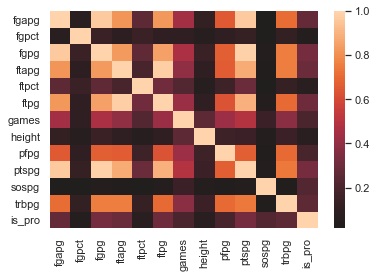

In [10]:
#Creating a heat map to illustrate the features corrrelation to each other
#==========================================================================
sns.heatmap(df.corr(), center=0)

#Save figure
#=====================
#plt.savefig("heatmap_corr.png", bbox_inches='tight', pad_inches=0  )

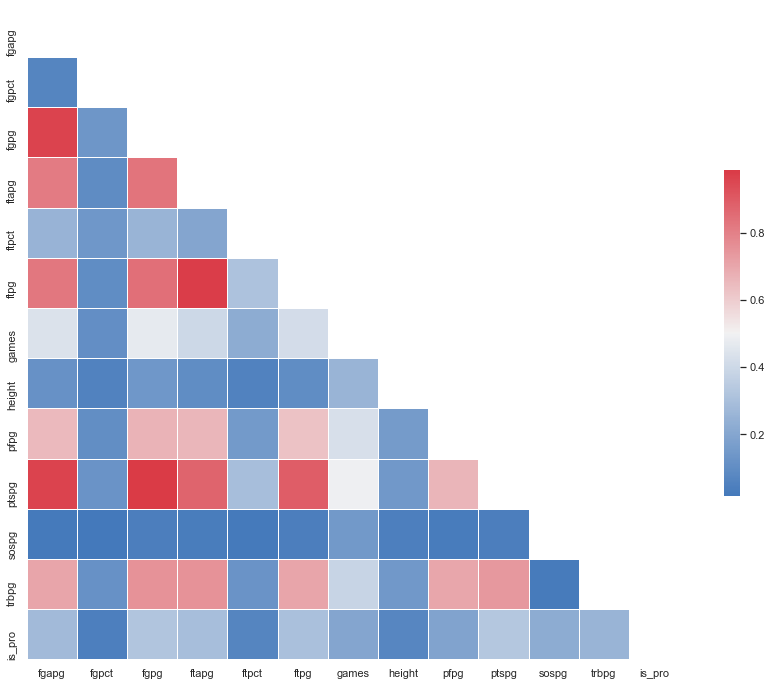

In [11]:
#Creating another illistration with the correlation Matrix
#=========================================================
CorrMtx(df.corr(), dropDuplicates=True)

#Save fig as png
#plt.savefig('CorrMtx.png', bbox_inches='tight', pad_inches=0)

In [12]:
df.shape

(85469, 15)

In [13]:
#Split data set in half to use first half to train model and second half to test our prediction 
train = df.iloc[:42734]
test = df.iloc[42734:]

In [14]:
train

,url,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,/cbb/players/menghe-anyam-1.html,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,77.0,2.2,2.4,-4.15,3.0,0
1,/cbb/players/jordan-aaberg-1.html,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,81.0,1.6,3.5,-3.07,2.3,0
2,/cbb/players/karl-aaker-1.html,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,77.0,2.3,4.1,1.37,2.0,0
3,/cbb/players/steve-aaker-1.html,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,77.0,3.0,6.2,3.05,5.1,0
4,/cbb/players/waine-aalto-1.html,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,70.0,1.1,3.1,1.63,1.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54676,/cbb/players/hank-knight-1.html,Hank Knight,0.4,0.500,0.2,0.2,1.000,0.2,5.0,74.0,0.4,0.6,-3.99,0.4,0
54677,/cbb/players/horace-knight-1.html,Horace Knight,1.2,2.816,3.3,2.1,0.750,1.6,32.0,74.0,1.3,8.3,-3.70,2.0,0
54679,/cbb/players/jalen-knight-1.html,Jalen Knight,0.5,0.500,0.3,0.7,0.250,0.2,12.0,72.0,0.5,0.8,-5.26,0.6,0
54680,/cbb/players/james-knight-1.html,James Knight,2.9,0.490,1.4,1.4,0.653,0.9,52.0,76.0,1.4,3.8,-2.19,2.5,0


In [15]:
test

,url,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
54682,/cbb/players/jeff-knight-1.html,Jeff Knight,1.3,0.250,0.3,0.9,0.471,0.4,19.0,0.0,0.5,1.1,0.88,1.6,0
54683,/cbb/players/jim-knight-1.html,Jim Knight,4.0,0.340,1.4,0.7,0.630,0.5,37.0,75.0,1.8,2.9,-5.72,2.2,0
54684,/cbb/players/joe-knight-1.html,Joe Knight,11.2,0.390,4.4,4.8,0.762,3.6,95.0,74.0,2.1,14.2,-6.77,4.1,0
54686,/cbb/players/john-knightiii-1.html,John Knight,9.0,0.517,4.6,5.2,0.694,3.6,77.0,75.0,2.3,13.0,-2.15,4.0,0
54687,/cbb/players/kelly-knight-1.html,Kelly Knight,7.7,0.560,4.3,2.6,0.693,1.8,101.0,80.0,2.9,10.5,5.70,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109654,/cbb/players/serge-zwikker-1.html,Serge Zwikker,6.1,0.501,3.0,1.2,0.696,0.9,120.0,87.0,1.9,7.0,11.47,5.0,0
109655,/cbb/players/joe-zych-1.html,Joe Zych,3.0,0.343,1.0,0.9,0.500,0.4,23.0,0.0,1.5,2.5,-2.76,2.1,0
109657,/cbb/players/jack-zyla-1.html,Jack Zyla,7.7,0.400,3.1,1.2,0.630,0.8,65.0,0.0,1.7,7.0,-12.74,2.0,0
109659,/cbb/players/brock-zylstra-1.html,Brock Zylstra,4.1,0.429,1.8,1.1,0.674,0.7,119.0,78.0,1.3,5.1,3.51,2.8,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)

In [17]:
features = df.drop(columns=['is_pro','url','name'])

In [18]:
labels = ['Not Drafted', 'Drafted']

In [19]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(7,7))
    plt.barh(range(n_features), model.feature_importances_, align='center', color = 'cornflowerblue') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [20]:
def plot_feature_importance(model, x_train, n=27):
    # extract and sort the feature importance
    features = model.feature_importances_
    feature_names = x_train.columns.values
    
    # combine the features importance and column names into a matrix and sort them
    feature_matrix = np.array([features, feature_names])
    feature_matrix = feature_matrix.transpose()
    feature_matrix.sort(0)
    
    # divide the column names and feature importance
    sorted_feat = feature_matrix[:, 0]
    sorted_columns = feature_matrix[:, 1]
    
     # plot the features
    plt.figure(figsize=(16, 12))
    try:
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center', color = 'green')
    
    except:
        # if n features is greater than the amount that actually exists
        n = len(sorted_feat)
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
        
    plt.yticks(sorted_columns[-n:], sorted_columns[-n:])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    return

# Confusion Matrix Function Plot

In [21]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Greens):
    
    # Compute confusion matrix
    cmat = pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True)
    print(cmat)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Decision Tree Classification

In [22]:
#Define classy_tree
classy_tree = DecisionTreeClassifier(max_depth = 2)

In [23]:
#Features and Predicted
y = df['is_pro']

X  = features

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=22)

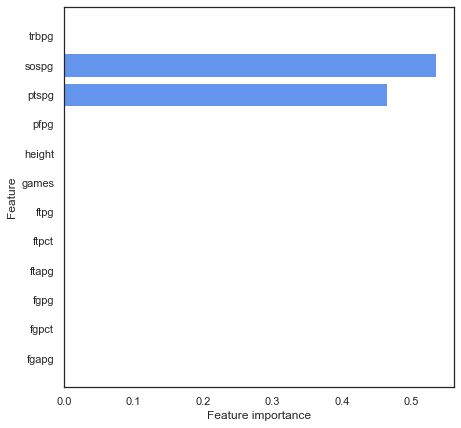

In [25]:
plot_feature_importances(classy_tree.fit(X_train, y_train))

In [26]:
classy_tree_cv_score = cross_val_score(classy_tree, X_train, y_train, cv=3)
mean_classy_tree_cv_score = np.mean(classy_tree_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_classy_tree_cv_score * 100))

Mean Cross Validation Score: 96.63%


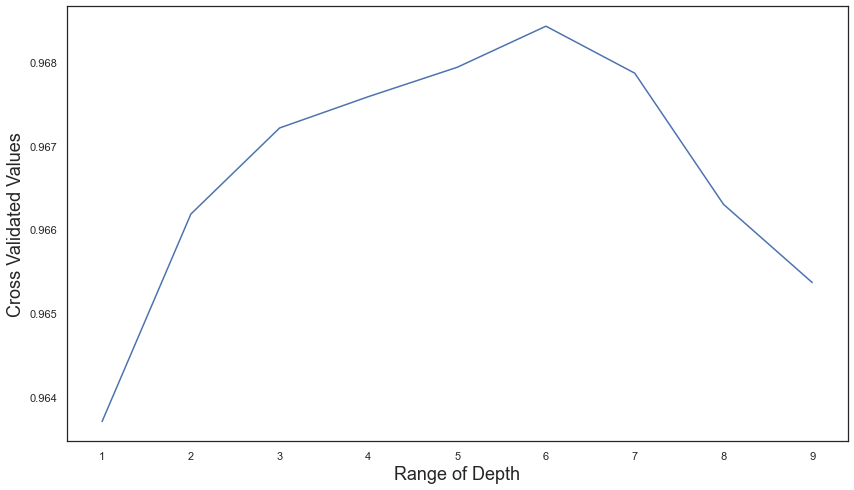

In [27]:
score = cross_val_score(classy_tree, X_train, y_train, cv = 10)
score.mean()
depth_range = range(1,10)
val = []
for depth in depth_range:
    classy_tree = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(classy_tree, X_train, y_train, cv = 10)
    val.append(depth_score.mean())
    
#Print(val)
#===========================
plt.figure(figsize = (14,8))
plt.plot(depth_range, val)
plt.xlabel('Range of Depth',size=18)
plt.ylabel('Cross Validated Values',size=18)
plt.show()

# Model Testing

In [28]:
classy_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9)

In [29]:
#Predict the response for new observations
test_preds = classy_tree.predict(X_test)

In [30]:
#how well did our model predict our correct class? 
accuracy_score(y_test, test_preds)

0.9641511641511642

In [31]:
def print_metrics(labels, preds):
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)
print(f'\n{classification_report(y_test, test_preds)}')

Accuracy Score: 0.9641511641511642
Precision Score: 0.5210688591983555
Recall Score: 0.32231404958677684
F1 Score: 0.3982717989002356

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     41162
           1       0.52      0.32      0.40      1573

    accuracy                           0.96     42735
   macro avg       0.75      0.66      0.69     42735
weighted avg       0.96      0.96      0.96     42735



Predicted      0    1    All
True                        
0          40696  466  41162
1           1066  507   1573
All        41762  973  42735


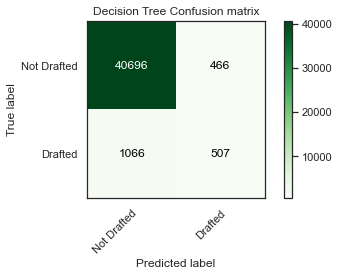

<Figure size 432x288 with 0 Axes>

In [32]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_preds, classes=labels,
                      title='Decision Tree Confusion matrix')

plt.show()

plt.savefig("DecisionTreeCufusion1.png", bbox_inches='tight', pad_inches=0.5 )

# Standard Scalar For Decision Tree

In [33]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  


model = DecisionTreeClassifier(max_depth = 9)
model.fit(X_train_scaled, y_train)

test_pred_scaled = model.predict(X_test_scaled)

In [34]:
def print_metrics(labels, preds):
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_pred_scaled)

print(f'\n{classification_report(y_test, test_pred_scaled)}')

Accuracy Score: 0.9642213642213642
Precision Score: 0.5229166666666667
Recall Score: 0.31913541004450097
F1 Score: 0.39636794315041457

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     41162
           1       0.52      0.32      0.40      1573

    accuracy                           0.96     42735
   macro avg       0.75      0.65      0.69     42735
weighted avg       0.96      0.96      0.96     42735



Predicted      0    1    All
True                        
0          40696  466  41162
1           1066  507   1573
All        41762  973  42735


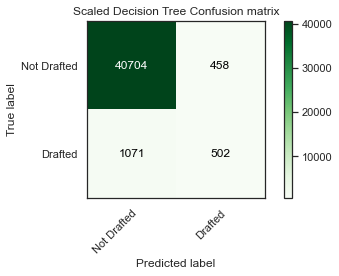

<Figure size 432x288 with 0 Axes>

In [35]:
np.set_printoptions(precision=1)

#Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_pred_scaled, classes=labels,
                      title='Scaled Decision Tree Confusion matrix')

plt.show()

plt.savefig('Scaled_Decision_Tree_Confusion_Matrix1.png', bbox_inches='tight', pad_inches=0 )

# Grid Search Decision Tree

In [36]:
dt_grid_param = {'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 2, 3, 4, 5, 6],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}

dt_grid_search = GridSearchCV(classy_tree, dt_grid_param, verbose=1, cv=3, n_jobs=-1)

dt_gs_results = dt_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [37]:
#Predict values based on new parameters
y_pred_acc = dt_grid_search.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))
print("Best Parameter Found:")
print(dt_grid_search.best_params_)
print("\nBest Estimator Found:")
print(dt_grid_search.best_estimator_)
print("Best i Score Found:")
print(dt_grid_search.best_score_)

Accuracy Score : 0.9663975663975664
Precision Score : 0.5917001338688086
Recall Score : 0.2809917355371901
F1 Score : 0.38103448275862073
Best Parameter Found:
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2}

Best Estimator Found:
DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=6)
Best i Score Found:
0.9692048447313822


# Decision Tree Grid Search Confusion Matrix

Predicted      0    1    All
True                        
0          40696  466  41162
1           1066  507   1573
All        41762  973  42735


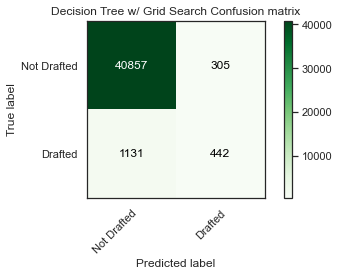

<Figure size 432x288 with 0 Axes>

In [38]:
np.set_printoptions(precision=1)

#Plot non-normalized confusion matrix
#==========================================================================
plot_confusion_matrix(y_test, y_pred_acc, classes=labels,
                      title='Decision Tree w/ Grid Search Confusion matrix')

plt.show()
plt.savefig('Dtree_GridSrch_ConMtx.png', bbox_inches='tight', pad_inches=0 )

# Testing

In [39]:
known_outcomes = test.drop(columns=['name','url'], axis=1)
names = test['name']
known_outcomes

,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
54682,1.3,0.250,0.3,0.9,0.471,0.4,19.0,0.0,0.5,1.1,0.88,1.6,0
54683,4.0,0.340,1.4,0.7,0.630,0.5,37.0,75.0,1.8,2.9,-5.72,2.2,0
54684,11.2,0.390,4.4,4.8,0.762,3.6,95.0,74.0,2.1,14.2,-6.77,4.1,0
54686,9.0,0.517,4.6,5.2,0.694,3.6,77.0,75.0,2.3,13.0,-2.15,4.0,0
54687,7.7,0.560,4.3,2.6,0.693,1.8,101.0,80.0,2.9,10.5,5.70,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109654,6.1,0.501,3.0,1.2,0.696,0.9,120.0,87.0,1.9,7.0,11.47,5.0,0
109655,3.0,0.343,1.0,0.9,0.500,0.4,23.0,0.0,1.5,2.5,-2.76,2.1,0
109657,7.7,0.400,3.1,1.2,0.630,0.8,65.0,0.0,1.7,7.0,-12.74,2.0,0
109659,4.1,0.429,1.8,1.1,0.674,0.7,119.0,78.0,1.3,5.1,3.51,2.8,0


In [40]:
prediction = test
prediction = prediction.drop(columns=['name','url','is_pro'])

In [44]:
index_list = prediction.index.tolist()
output_list = []
counter = 0

for val in index_list:
    input_row = prediction.loc[val, :]
    input_list = [input_row]
    output = classy_tree.predict(input_list)
    #print(counter, output)
    #counter+=1
    output_list.append(output[0])
    
print('Done')

Done


In [45]:
prediction_results_df = pd.DataFrame(names)
is_pro_list = test['is_pro'].tolist()
correct_list = []

for j in range(0, len(is_pro_list)):
    if output_list[j] == is_pro_list[j]:
        correct_list.append('Yes')
    else:
        correct_list.append('No')

prediction_results_df['is_pro_actual'] = is_pro_list
prediction_results_df['is_pro_prediction'] = output_list
prediction_results_df['correct_prediction'] = correct_list
prediction_results_df

,name,is_pro_actual,is_pro_prediction,correct_prediction
54682,Jeff Knight,0,0,Yes
54683,Jim Knight,0,0,Yes
54684,Joe Knight,0,0,Yes
54686,John Knight,0,0,Yes
54687,Kelly Knight,0,0,Yes
...,...,...,...,...
109654,Serge Zwikker,0,0,Yes
109655,Joe Zych,0,0,Yes
109657,Jack Zyla,0,0,Yes
109659,Brock Zylstra,0,0,Yes


In [46]:
prediction_results_df['correct_prediction'].value_counts()

Yes    41540
No      1195
Name: correct_prediction, dtype: int64

In [ ]:
prediction_results_df.to_csv('DecisionTreePrediction.csv' , index=false)